# COGS 108 - Final Project 

# Airbnb and Crime in New York City

# Overview

Airbnb home rentals are highly popular in New York City. Given the variation across New York City in culture, economy, and, most significant to our question, crime, we would expect Airbnb price variation to occur as well. We expect crime to be a primary factor in accounting for Airbnb price variation. Here we provide data analysis and discussions of how crime relates to this price variation and what other factors are at play in crime and price distribution differences between New York City's boroughs.

# Names

- Amelia Harrison
- Chingyen Huang 
- Dustin Crotty 
- Brayden Crosta 
- Taeksu Kim 
- Guolong Li

# Group Members IDs

- A13526501
- A14739698
- A12859924
- A13901386
- A12961029
- A15337753

# Research Question

####  Primary question: How do different types of crime influence Airbnb price listings across New York City boroughs? 
Constituent questions (further variables to consider and discuss): What are the safest boroughs to rent Airbnbs in? What boroughs offer the best value (safety to price ratio) for Airbnbs? What other factors could influence Airbnb prices?

## Background and Prior Work

#### Amongst the many factors that determine a person’s desire to live in a location is safety. Whether it’s a natural disaster, a man-made catastrophe, or a suspicious neighbor, desirability to live in that location decreases. If all else is held constant, most people would prefer to live in a safer borough than one with a larger crime rate. In a free market society, price is determined by supply and demand: increase in supply leads to decreased price and decrease in demand also leads to decreased price. A neighborhood with higher crime rate will lower the residents’ and possible future residents’ desirability to live in that community, which will result in lower real estate price per capita compared to that of a similar neighborhood with lower crime rate. We want to explore the ways in which crime rate may affect Airbnb prices.
#### Over the past few years, Airbnb has emerged as a popular alternative to hotels. It is a website/app that allows hosts to open up their own homes or apartments to be booked by consumers on the Airbnb platform. Hosts can list various features and amenities of their Airbnb, such as room type, number of guests, minimum number of days to book, price, etc. Airbnbs tend to be priced much cheaper than hotels, making them a desirable and cost effective option. We will be looking at Airbnb listings in the city of New York in 2019 and looking at what their prices are, where they are located, and what the types and rates of crime are in those areas.

#### Our data science questions and hypothesis are preceded by similar questions posed by other data scientists. For instance, in 2017, New York Data Science Academy student Chung Meng Lim explored the dynamics of subway station location, crime, and neighborhoods in New York City. NYC is the largest market for Airbnb in the US, making understanding which neighborhoods are desirable to renters, and why, invaluable to Airbnb Hosts. The datasets used in Lim’s analysis, which were primarily from NYC Open Data, helped us narrow down which datasets we would use in ours. Another student at the NYDSA, Yu-Han Chen, also did a project on Airbnb in NYC. It was this project that guided us to Inside Airbnb, an independent website with many easily accessible datasets for Airbnb in different cities. Additionally, her research questions, which started off as simple and gradually became more complex, gave us a framework for how we should frame our research questions. It was also this project that gave us the idea to look at rates over time, rather than at one single point in time. 

#### We then want to consider potential causes for different Airbnb prices among regions with similar crime rates. A plausible explanation for these differences may be proximity to tourist attractions. These attractions vary based upon the time of year; it will be useful to consider whether events during the holiday season are correlated with different spreads of Airbnb prices than the rest of the year. We have some background knowledge of these attractions, such as the New Year's Eve celebrations and the New York Marathon. We will expand upon this list by researching which other events contribute to the city’s tourism. All of these considerations form a second stage of analysis after the aforementioned preliminary analyses are completed. Here we are attempting to explain the variations we see in the Airbnb prices versus crime analysis using tourism as a potential background factor. USNews.com has shown the correlation between the most popular times to visit New York City versus hotel prices during those periods, indicating that hotel prices surprisingly descend toward the end of the year as tourism increases, according to their estimates of tourism levels. We hope to find whether tourism would have a different impact on the less regulated Airbnb market, using the discussed data at our disposal. 

#### References (include links):
#### - 1) https://nycdatascience.com/blog/student-works/r-visualization/airbnb-new-york-city-2017-dynamics-subway-crime-neighborhoods/
#### - 2) https://nycdatascience.com/blog/student-works/nyc-airbnb-insights/

# Hypothesis


#### A higher rate of crime will correlate with a lower Airbnb listing price. Specifically, higher violent crime will correlate more strongly with lower price.

# Dataset(s)

#### - Dataset Name: New York City Violent Crime and Property Crime 2017
#### - Link to the dataset: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i
#### - Number of observations: 33851

#### New York City crime data from 2017. Taken from NYC Open Data website and filtered to only include property crime and violent crimes.

#### - Dataset Name: New York City Airbnb Open Data
#### - Link to the dataset: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
#### - Number of observations: 48895

#### New York City Airbnb data from 2019. It contains summary information such as price, location, room type, etc.

#### We plan to combine these datasets by looking at the Airbnb data in each borough as well as the crime data in each borough and comparing the two.

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stats
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [2]:
# Creating three pandas DataFrames, one from the airbnb data, one from the crime data, one from the population data
df_AB=pd.read_csv('AB_NYC_2019.csv')
df_crime=pd.read_csv('NYC Violent Crime and Property Crime 2017.csv')
df_population = pd.read_csv('New_York_City_Population_by_Borough__1950_-_2040.csv')

# Data Cleaning

### We cleaned our data by dropping unneeded columns. For Airbnb, we only kept neighborhood group (borough), latitude, longitude, and price. For the crime data, we only kept the offense description, borough name, latitude, and longitude. For the population data, we only kept the 2020 population data as an estimate for the 2017 population data.

In [3]:
# Dropping unneeded columns
# Airbnb:keep price, neightbourhood, lat, long
df_AB=df_AB[['neighbourhood_group','latitude','longitude','price']]
        #dropped host_name due to, Safe Harbour Method.
# Crime Rate: keep offense description, borough name, lat, long
df_crime=df_crime[['OFNS_DESC','BORO_NM','Latitude','Longitude']]
# Population: only keep 2020 as an estimate of 2017
df_popul_2017 = df_population['2020']

In [4]:
##Cleaning Airbnb Data
#remove null
df_AB.dropna(inplace=True)
#change all price into int
df_AB.price=df_AB.price.astype(int)
#remove any pricing 0 and under
df_AB=df_AB[df_AB['price']>0]

## reorganize them by geographical region
df_AB_D=df_AB[['neighbourhood_group','price']]
D_name=df_AB_D.neighbourhood_group.unique()


# Data Analysis & Results

### We first visualize the crime data on a map of NYC using GeoPandas and matplotlib. An image of the boroughs is included below for context.

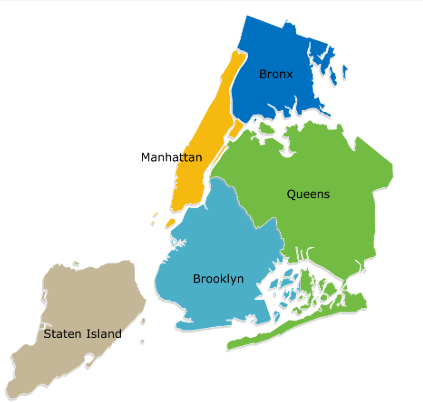

In [5]:
# Reading the shape file
nyc_map = gpd.read_file("geo_export_54ecec33-513c-4e10-ad1a-3b2ac815395d.shp")

# Creating a list named geometry of Point objects based on latitude and longitude
geometry = [Point(xy) for xy in zip( df_crime["Longitude"], df_crime["Latitude"])]

# Setting coordinate reference system
crs = {'init': 'epsg:4326'}

In [6]:
# Creating GeoDataFrame
geo_df = gpd.GeoDataFrame(df_crime, crs=crs, geometry = geometry)

### Property crime is in blue and violent crime is in red.

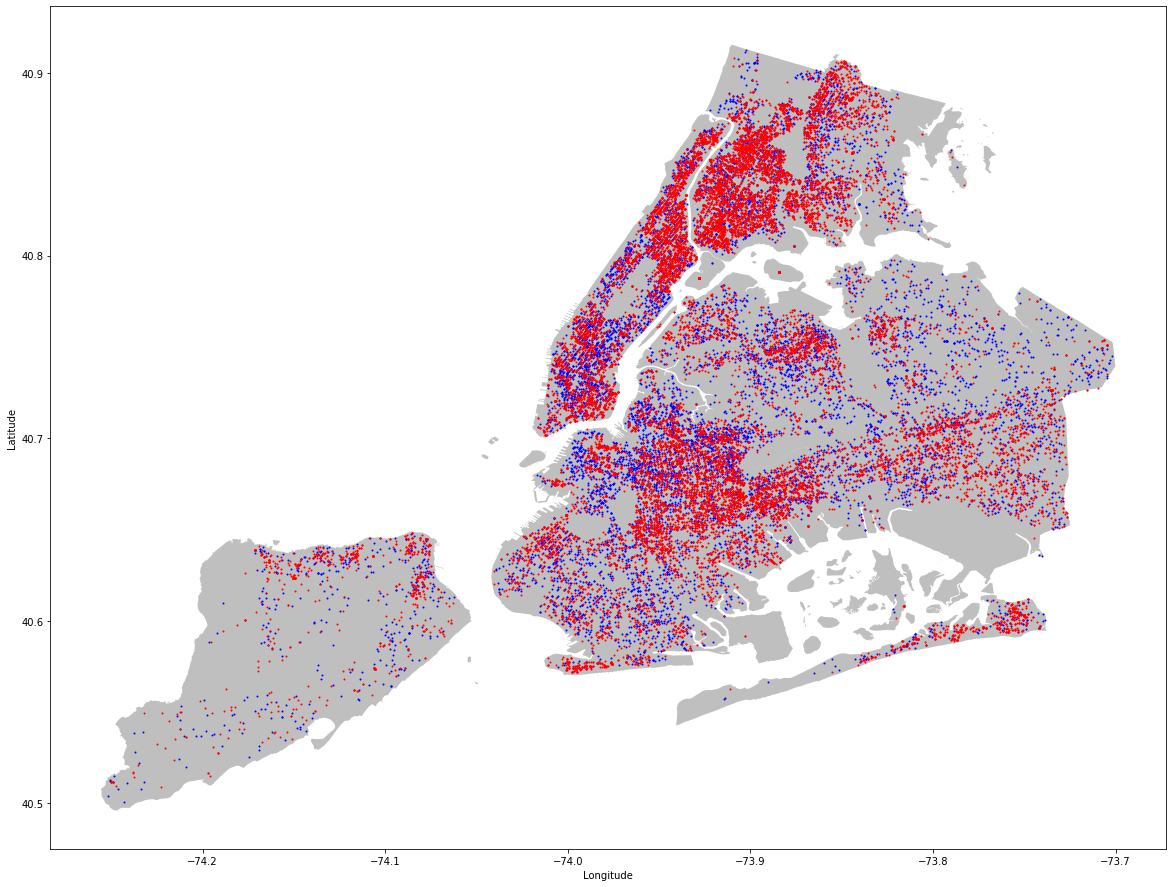

In [7]:
# Visualizing on a map, property crime is in blue, violent crime is in red
fix, ax = plt.subplots(figsize = (20,20))
nyc_map.plot(ax=ax, alpha=0.5, color='grey')
geo_df[geo_df["OFNS_DESC"]=="BURGLARY"].plot(ax=ax, markersize=1, color="blue")
geo_df[geo_df["OFNS_DESC"]!="BURGLARY"].plot(ax=ax, markersize=1, color="red")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### It appears that there is a large amount of violent crime in the Bronx, northeast Manhattan, and central Brooklyn. Property crime seems to be spread out amongst the boroughs.

### Next, we look at a map of the Airbnbs. We have colored the Airbnbs differently based on what price they are listed at. Red is less than 100 dollars, blue is between 100 and 300 dollars, green is between 300 and 500 dollars, black is between 500 and 700 dollars, and orange is above 700 dollars

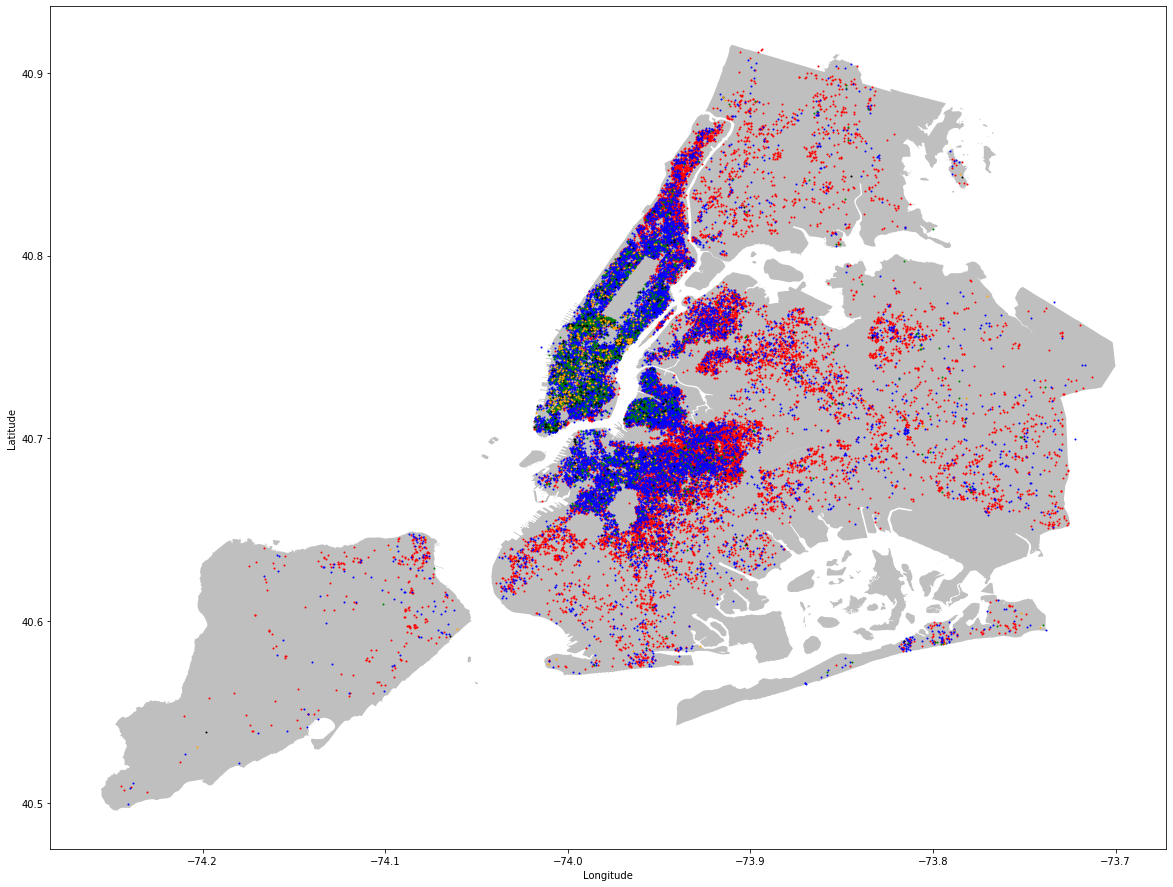

In [8]:
geometry2 = [Point(xy) for xy in zip( df_AB["longitude"], df_AB["latitude"])]
geo_df2 = gpd.GeoDataFrame(df_AB, crs=crs, geometry = geometry2)
fix, ax = plt.subplots(figsize = (20,20))
nyc_map.plot(ax=ax, alpha=0.5, color='grey')
geo_df2[geo_df2["price"]<=100].plot(ax=ax, markersize=1, color="red")
geo_df2[(geo_df2["price"]>100) & (geo_df2["price"]<= 300)].plot(ax=ax, markersize=1, color="blue")
geo_df2[(geo_df2["price"]>300) & (geo_df2["price"]<= 500)].plot(ax=ax, markersize=1, color="green")
geo_df2[(geo_df2["price"]>500) & (geo_df2["price"]<= 700)].plot(ax=ax, markersize=1, color="black")
geo_df2[(geo_df2["price"]>700)].plot(ax=ax, markersize=1, color="orange")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### It appears that most of the Airbnbs listed between 100 and 300 dollars (blue) are located in north Brooklyn, as well as Manhattan. The most expensive Airbnbs that are over 500 dollars (black and orange), are mostly in Manhattan, with a few in north Brooklyn.

### Next, we're to compare the average prices of Airbnbs in each borough to the crime rate in that borough. First, we find the average price of Airbnbs in each borough (Bronx, Brooklyn, Manhattan, Queens, Staten Island).

In [9]:
df_avg_price = df_AB_D.groupby('neighbourhood_group').mean()
avg_prices = df_avg_price.to_numpy()
df_avg_price

,price
neighbourhood_group,
Bronx,87.577064
Brooklyn,124.438915
Manhattan,196.884903
Queens,99.517649
Staten Island,114.812332


### Now, we find the crime rate in each borough, separating property crime and violent crime.

In [10]:
population_each_bom = []
for i in df_popul_2017:
    population_each_bom.append(i)

In [11]:
tmpdf = df_crime.dropna(subset=['BORO_NM'])
df_BRONX = tmpdf[tmpdf['BORO_NM'] == 'BRONX']
df_BROOKLYN = tmpdf[tmpdf['BORO_NM'] == 'BROOKLYN']
df_MANHATTAN = tmpdf[tmpdf['BORO_NM'] == 'MANHATTAN']
df_QUEENS = tmpdf[tmpdf['BORO_NM'] == 'QUEENS']
df_STATEN_ISLAND = tmpdf[tmpdf['BORO_NM'] == 'STATEN ISLAND']

In [12]:
prop_crime_rate_BRONX = len(df_BRONX[df_BRONX["OFNS_DESC"]=="BURGLARY"])/population_each_bom[1]*1000
prop_crime_rate_BROOKLYN = len(df_BROOKLYN[df_BROOKLYN["OFNS_DESC"]=="BURGLARY"])/population_each_bom[2]*1000
prop_crime_rate_MANHATTAN = len(df_MANHATTAN[df_MANHATTAN["OFNS_DESC"]=="BURGLARY"])/population_each_bom[3]*1000
prop_crime_rate_QUEENS = len(df_QUEENS[df_QUEENS["OFNS_DESC"]=="BURGLARY"])/population_each_bom[4]*1000
prop_crime_rate_STATEN_ISLAND = len(df_STATEN_ISLAND[df_STATEN_ISLAND["OFNS_DESC"]=="BURGLARY"])/population_each_bom[5]*1000

In [13]:
print("The property crime rate in BRONX is", prop_crime_rate_BRONX,"crimes per 1000 people.")
print("The property crime rate in BROOKLYN is", prop_crime_rate_BROOKLYN,"crimes per 1000 people.")
print("The property crime rate in MANHATTAN is", prop_crime_rate_MANHATTAN,"crimes per 1000 people.")
print("The property crime rate in QUEENS is", prop_crime_rate_QUEENS,"crimes per 1000 people.")
print("The property crime rate in STATEN ISLAND is", prop_crime_rate_STATEN_ISLAND,"crimes per 1000 people.")

The property crime rate in BRONX is 1.5586250369784653 crimes per 1000 people.
The property crime rate in BROOKLYN is 1.5401449601503068 crimes per 1000 people.
The property crime rate in MANHATTAN is 1.4863140084027098 crimes per 1000 people.
The property crime rate in QUEENS is 1.258209797471994 crimes per 1000 people.
The property crime rate in STATEN ISLAND is 0.8518849236895855 crimes per 1000 people.


In [14]:
viol_crime_rate_BRONX = len(df_BRONX[df_BRONX["OFNS_DESC"]!="BURGLARY"])/population_each_bom[1]*1000
viol_crime_rate_BROOKLYN = len(df_BROOKLYN[df_BROOKLYN["OFNS_DESC"]!="BURGLARY"])/population_each_bom[2]*1000
viol_crime_rate_MANHATTAN = len(df_MANHATTAN[df_MANHATTAN["OFNS_DESC"]!="BURGLARY"])/population_each_bom[3]*1000
viol_crime_rate_QUEENS = len(df_QUEENS[df_QUEENS["OFNS_DESC"]!="BURGLARY"])/population_each_bom[4]*1000
viol_crime_rate_STATEN_ISLAND = len(df_STATEN_ISLAND[df_STATEN_ISLAND["OFNS_DESC"]!="BURGLARY"])/population_each_bom[5]*1000

In [15]:
print("The violent crime rate in BRONX is", viol_crime_rate_BRONX,"crimes per 1000 people.")
print("The violent crime rate in BROOKLYN is", viol_crime_rate_BROOKLYN,"crimes per 1000 people.")
print("The violent crime rate in MANHATTAN is", viol_crime_rate_MANHATTAN,"crimes per 1000 people.")
print("The violent crime rate in QUEENS is", viol_crime_rate_QUEENS,"crimes per 1000 people.")
print("The violent crime rate in STATEN ISLAND is", viol_crime_rate_STATEN_ISLAND,"crimes per 1000 people.")

The violent crime rate in BRONX is 4.219692173283162 crimes per 1000 people.
The violent crime rate in BROOKLYN is 2.4727652228547092 crimes per 1000 people.
The violent crime rate in MANHATTAN is 2.441583586698497 crimes per 1000 people.
The violent crime rate in QUEENS is 1.761579542504275 crimes per 1000 people.
The violent crime rate in STATEN ISLAND is 1.438967063870842 crimes per 1000 people.


In [16]:
prop_crime_rates = np.array([prop_crime_rate_BRONX, prop_crime_rate_BROOKLYN, prop_crime_rate_MANHATTAN,
                        prop_crime_rate_QUEENS, prop_crime_rate_STATEN_ISLAND])
viol_crime_rates = np.array([viol_crime_rate_BRONX, viol_crime_rate_BROOKLYN, viol_crime_rate_MANHATTAN,
                        viol_crime_rate_QUEENS, viol_crime_rate_STATEN_ISLAND])

### This dataframe shows average price, property crime rate, and violent crime rate all together.

In [17]:
df_all = df_avg_price
df_all['prop_crime_rates'] = prop_crime_rates
df_all['viol_crime_rates'] = viol_crime_rates
df_all

,price,prop_crime_rates,viol_crime_rates
neighbourhood_group,,,
Bronx,87.577064,1.558625,4.219692
Brooklyn,124.438915,1.540145,2.472765
Manhattan,196.884903,1.486314,2.441584
Queens,99.517649,1.258210,1.761580
Staten Island,114.812332,0.851885,1.438967


In [18]:
avg_prices = np.squeeze(avg_prices)

### This scatter plot shows the average Airbnb price plotted versus the Property Crime Rate. Each datapoint is a separate borough.

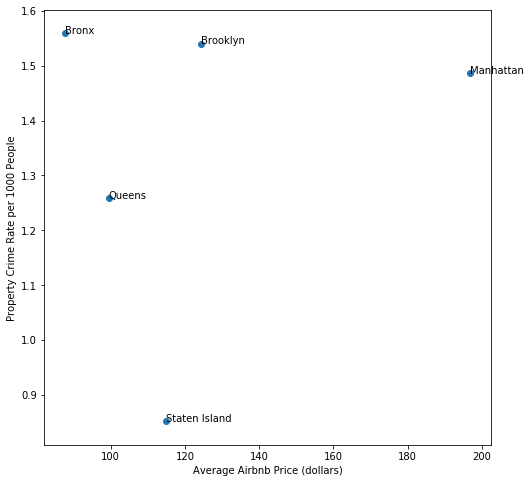

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(avg_prices, prop_crime_rates)
plt.xlabel("Average Airbnb Price (dollars)")
plt.ylabel("Property Crime Rate per 1000 People")

for i, txt in enumerate(df_all.index):
    ax.annotate(txt, (avg_prices[i], prop_crime_rates[i]))

### While the Bronx, Brooklyn, and Manhattan have large differences in average price, they all share similar property crime rates.

### This scatter plot shows the average Airbnb price plotted versus the Violent Crime Rate. Each datapoint is a separate borough.

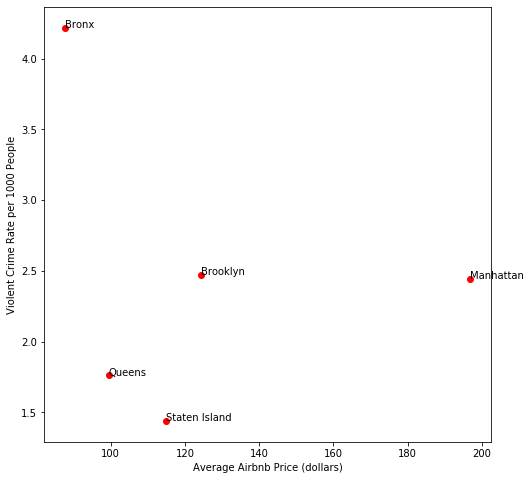

In [20]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(avg_prices, viol_crime_rates, color="red")
plt.xlabel("Average Airbnb Price (dollars)")
plt.ylabel("Violent Crime Rate per 1000 People")

for i, txt in enumerate(df_all.index):
    ax.annotate(txt, (avg_prices[i], viol_crime_rates[i]))

### The Bronx has the highest violent crime rate and the lowest average Airbnb price.

### Next, we'll compute correlation coefficients to see if either crime rates are correlated with average Airbnb price.

In [21]:
np.corrcoef(avg_prices,prop_crime_rates)

array([[1.        , 0.18222297],
       [0.18222297, 1.        ]])

### The correlation between property crime rate and average Airbnb price is 0.18. This is a weak positive correlation.

In [22]:
np.corrcoef(avg_prices,viol_crime_rates)

array([[ 1.        , -0.21175074],
       [-0.21175074,  1.        ]])

### The correlation between violent crime rate and average Airbnb price is -0.21. This is a moderate negative correlation.

### Next, let's visualize the crime data in stacked bar plots to see the proportions of property crime and violent crime in each borough.

In [23]:
bronx_prop_perc = len(df_BRONX[df_BRONX["OFNS_DESC"]=="BURGLARY"])/len(df_BRONX)
bronx_viol_perc = len(df_BRONX[df_BRONX["OFNS_DESC"]!="BURGLARY"])/len(df_BRONX)
brook_prop_perc = len(df_BROOKLYN[df_BROOKLYN["OFNS_DESC"]=="BURGLARY"])/len(df_BROOKLYN)
brook_viol_perc = len(df_BROOKLYN[df_BROOKLYN["OFNS_DESC"]!="BURGLARY"])/len(df_BROOKLYN)
manhat_prop_perc = len(df_MANHATTAN[df_MANHATTAN["OFNS_DESC"]=="BURGLARY"])/len(df_MANHATTAN)
manhat_viol_perc = len(df_MANHATTAN[df_MANHATTAN["OFNS_DESC"]!="BURGLARY"])/len(df_MANHATTAN)
queens_prop_perc = len(df_QUEENS[df_QUEENS["OFNS_DESC"]=="BURGLARY"])/len(df_QUEENS)
queens_viol_perc = len(df_QUEENS[df_QUEENS["OFNS_DESC"]!="BURGLARY"])/len(df_QUEENS)
staten_prop_perc = len(df_STATEN_ISLAND[df_STATEN_ISLAND["OFNS_DESC"]=="BURGLARY"])/len(df_STATEN_ISLAND)
staten_viol_perc = len(df_STATEN_ISLAND[df_STATEN_ISLAND["OFNS_DESC"]!="BURGLARY"])/len(df_STATEN_ISLAND)

prop_crime_percentages = [bronx_prop_perc,queens_prop_perc,staten_prop_perc,brook_prop_perc,manhat_prop_perc]
viol_crime_percentages = [bronx_viol_perc,queens_viol_perc,staten_viol_perc,brook_viol_perc,manhat_viol_perc]

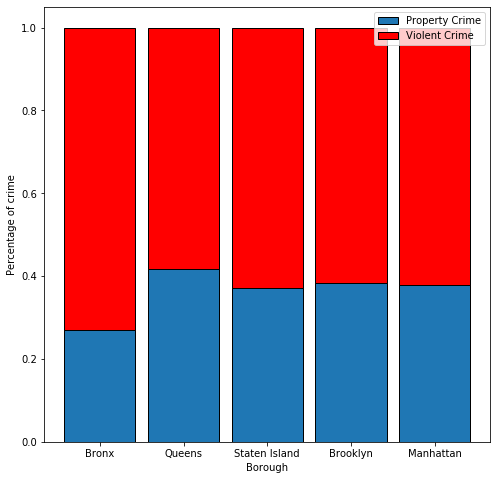

In [24]:
num = [0,1,2,3,4]
barWidth = 0.85
names = ["Bronx","Queens","Staten Island","Brooklyn","Manhattan"]
labels = ["Property Crime","Violent Crime"]
plt.figure(figsize=(8,8))
plt.bar(num,prop_crime_percentages, edgecolor="black", width=barWidth)
plt.bar(num,viol_crime_percentages, edgecolor="black", bottom=prop_crime_percentages, color='r', width=barWidth)
plt.xticks(num,names)
plt.xlabel("Borough")
plt.ylabel("Percentage of crime")
plt.legend(labels)
plt.show()

### The boroughs are ordered from left to right from lowest average Airbnb price to highest average Airbnb price. The Bronx has the highest violent crime rate proportion, Queens has the lowest, and the other three (Staten Island, Brooklyn, and Manhattan) have similar crime rate proportions.

### Next, we will make histograms to visualize the distributions of Airbnb prices for each borough.

In [25]:
df_his = df_AB.drop(['latitude','longitude','geometry'], axis=1)

### This joint histogram shows the price distributions of the 5 different boroughs.

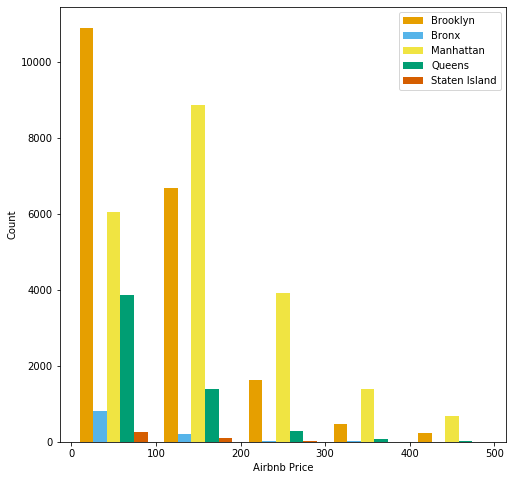

In [26]:
x1 = list(df_his[df_his['neighbourhood_group'] == 'Brooklyn']['price'])
x2 = list(df_his[df_his['neighbourhood_group'] == 'Bronx']['price'])
x3 = list(df_his[df_his['neighbourhood_group'] == 'Manhattan']['price'])
x4 = list(df_his[df_his['neighbourhood_group'] == 'Queens']['price'])
x5 = list(df_his[df_his['neighbourhood_group'] == 'Staten Island']['price'])

colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['Brooklyn', 'Bronx', 'Manhattan','Queens', 'Staten Island']

plt.figure(figsize=(8,8))
plt.hist([x1, x2, x3, x4, x5], bins = 5,range = (0,500) ,color = colors, label=names)
plt.xlabel("Airbnb Price")
plt.ylabel("Count")
plt.legend()

### The following histograms show the price distribution of each individual borough.

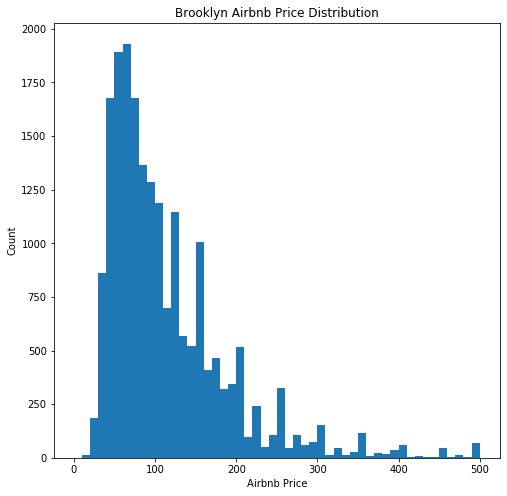

In [27]:
plt.figure(figsize=(8,8))
plt.hist(x1, bins=50, range=(0,500));
plt.title("Brooklyn Airbnb Price Distribution")
plt.xlabel("Airbnb Price");
plt.ylabel("Count");

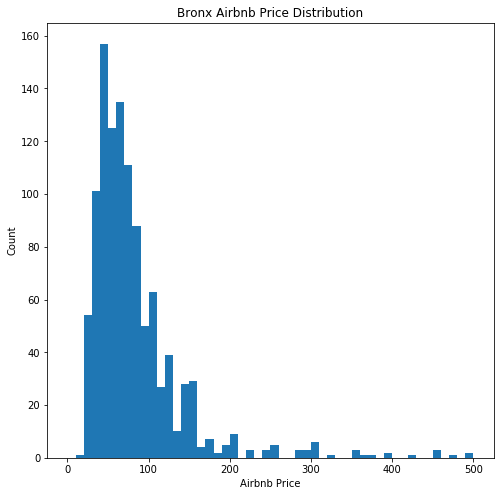

In [28]:
plt.figure(figsize=(8,8))
plt.hist(x2, bins=50, range=(0,500));
plt.title("Bronx Airbnb Price Distribution")
plt.xlabel("Airbnb Price");
plt.ylabel("Count");

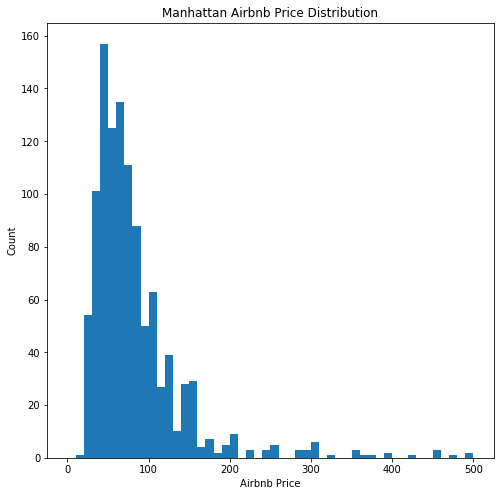

In [29]:
plt.figure(figsize=(8,8))
plt.hist(x2, bins=50, range=(0,500));
plt.title("Manhattan Airbnb Price Distribution")
plt.xlabel("Airbnb Price");
plt.ylabel("Count");

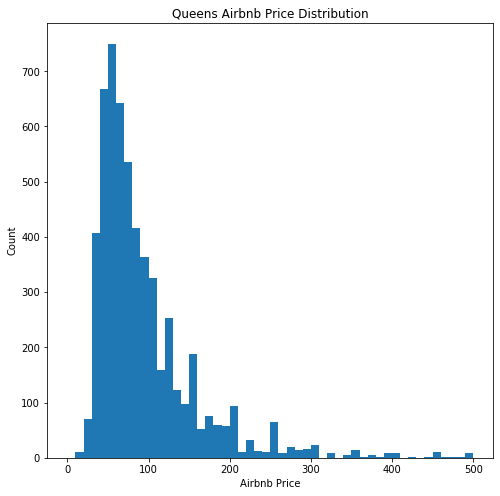

In [30]:
plt.figure(figsize=(8,8))
plt.hist(x4, bins=50, range=(0,500));
plt.title("Queens Airbnb Price Distribution")
plt.xlabel("Airbnb Price");
plt.ylabel("Count");

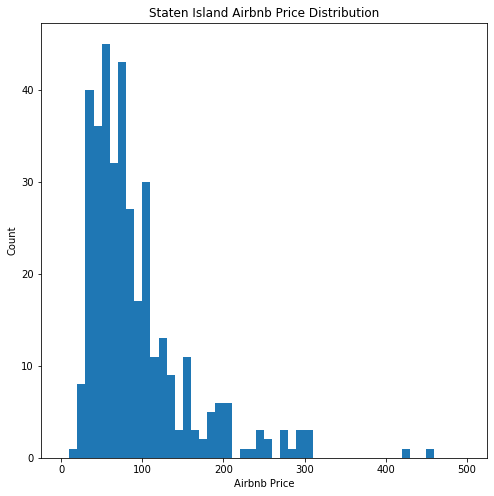

In [31]:
plt.figure(figsize=(8,8))
plt.hist(x5, bins=50, range=(0,500));
plt.title("Staten Island Airbnb Price Distribution")
plt.xlabel("Airbnb Price");
plt.ylabel("Count");

### All of the distributions appear to be right-skewed.

# Ethics & Privacy

#### Since the Airbnb data is not fully anonymized, there are risks to making conclusions about specific results as our research may affect Airbnb hosts and consumer choices within regions discussed. Our study is also not intended to generate fear around particular apparently dangerous areas of the city. Even when we are merely commenting on existing data published by the city of New York, we must be careful to accurately present what the data indicates. When we analyze the crime data in conjunction with Airbnb data, we should be cautious about making overly confident conclusions about causation, as there are many potential confounding factors in our study. The crime data has already been scrubbed for any identifying personal information. 

#### However, there are further implications for the potential results of this research. For instance, if automated decision-making were to become involved, there could be some implicit bias entering the scenario. If algorithms were designed to use this data in choosing the ‘best’ Airbnbs to rent, some ethical considerations would need to be taken. Many people rely on Airbnb as a source of income; potentially harming that income as a result of machine learning, with a potential implicit bias, may not be a good thing. On a broader scale, the inherent logic of these systems can be gamed, meaning it could be creating opportunities to ‘cheat’ the system. 

#### The misuse of data is a very real problem with potentially life-changing consequences. In light of that, it is important to do the best we can to preserve privacy, avoid bias in data selection, prevent disruption or ‘hacking’ of data, and remain transparent in data collection, research, and circulation.


# Conclusion & Discussion

#### Some of the questions that our team wanted to address are the following. Primarily, how do different types of crime influence Airbnb price listings? In addition, what are the safest boroughs to rent Airbnbs in? What boroughs offer the best value (safety to price ratio) for Airbnbs? What other factors could influence Airbnb prices? And our group used New York City Airbnb Open Data and New York City Violent Crime and Property Crime Data to answer these questions. However, due to limited available data, we had to base our result off of the following assumptions. We assumed that there was no drastic change in crime rate in New York City from 2017 (since that is the year of the available crime data), that Airbnb price did not fluctuate too much through different seasons of the year, and that there were no significant changes in relative Airbnb price rates amongst New York City boroughs between 2017 and 2019 (since 2019 is the year of the Airbnb data). As a result of these assumptions,  the conclusions of this study may not be fully reflective of today’s Airbnb price vs. crime relationship, but should serve as a step in the right direction towards better understanding this relationship.

#### The first step of the analysis involved visualizing the crime data on a map using GeoPandas and matplotlib, and the Airbnbs’ prices, colored differently based on price. This visualization demonstrated that property crime happens more uniformly throughout the entire city compared to the violent crimes.  Violent crimes are concentrated in 4-5 regions. And that the price of Airbnb peaks in Southwestern Manhattan region, and using it as the focal point, the price decreased as distance increased. Secondly, average prices of Airbnbs in each borough were calculated and graphed in relation to the crime rate in that borough. Average price of Airbnb increased in order of Bronx, Queen, Staten Island, Brooklyn, and Manhattan. But crime rate did not always increase in that order. For example, Brooklyn has higher violent crime rate than both Queens and Staten Island, yet Brooklyn’s average Airbnb price is higher than both.  Comparing our two crime metrics, we found that violent crime more strongly predicted Airbnb prices (property crime, r=0.18; violent crime, -0.21). Our analysis suggests that crime rate, especially violent crime rate, plays a significant role in determining the housing price but can be overruled by other factors. And visualizations of the proportions of property crime and violent crime in each borough support this argument. The general trend involved decreasing proportion of violent crime as housing price increased. The final visualization included the distribution of Airbnb price by each borough to display this overall distribution.

#### Our analysis suggests that crime rate, especially the violent crime rate, plays a key role in influencing the housing price, but our study faced too many limitations to be used as a robust foundation for further research. Our group had to work with average values over a large area ignoring localized fluctuation that may have been due to smaller scale factors such as access to subway stations, grocery markets, cultural centers, and tourism.  Average price included all types of room, leaving it prone to outliers such as a cheaper listing that only rents out a studio. Also, there may have been a categorization issue resulting in misleading distributions of violent crime in the data, because the New York City Violent Crime and Property Crime 2017 included RAPE, BURGLARY, FELONY ASSAULT, and MURDER & NON-NEGL. MANSLAUGHTER, and we categorized BURGLARY as a property crime while categorizing all else as violent crime. And there’s also a directionality problem. Property crime may have been recorded to be higher in a richer neighborhood because richer houses offer greater incentives to the burglars. Or richer neighborhood may experience less violent crime because it is a safer neighborhood overall. These considerations limit the robustness of our conclusions; the high number of conflating variables makes difficult any claims of direct causation. Future studies would benefit from determining a methodology to reduce conflating variables to resolve these challenges.

#### Our results suggest that crime rate is a correlated, but not provably decisive, factor in determining Airbnb prices. We conclude also that to a significant extent, swaths of the population do not prioritize safety most highly in choosing their residence and are willing to compromise their safety for other cultural and economic considerations. Further studies should be done to analyze how different types of crime in an area affect the housing price of that region, which may serve as a statistical basis for housing game theory. Deeper analyses of the many factors that influence Airbnb prices, including not only crime but also transportation, cultural centers, tourism, and more, would aid in further illuminating the complex web of causation involved in these data.
